In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Loading Data

1. โหลด csv เข้าไปใน Python Pandas  

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว  

3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม  

4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น  

5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ  


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/german_credit_data_target.csv', index_col = 0)

In [3]:
df.head(10)
df.tail(10)
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
203,21,male,2,rent,little,little,902,12,education,bad
357,26,male,3,own,little,NaN,4463,36,radio/TV,bad
348,34,male,1,own,moderate,NaN,1743,6,business,good
756,74,male,0,own,little,rich,1299,6,car,good
27,42,female,2,rent,rich,rich,409,12,radio/TV,good
188,20,male,2,own,moderate,little,674,12,radio/TV,bad
25,36,male,1,own,little,little,1374,6,furniture/equipment,good
856,40,female,2,own,NaN,NaN,894,10,education,good
125,30,male,2,own,little,little,2121,12,car,good
136,27,male,2,own,rich,NaN,8613,27,car,good


In [4]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [5]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [7]:
### drop columns (Saving accounts, Checking account)
df = df.drop(columns=['Saving accounts', 'Checking account'], axis = 0)

<Figure size 864x576 with 0 Axes>

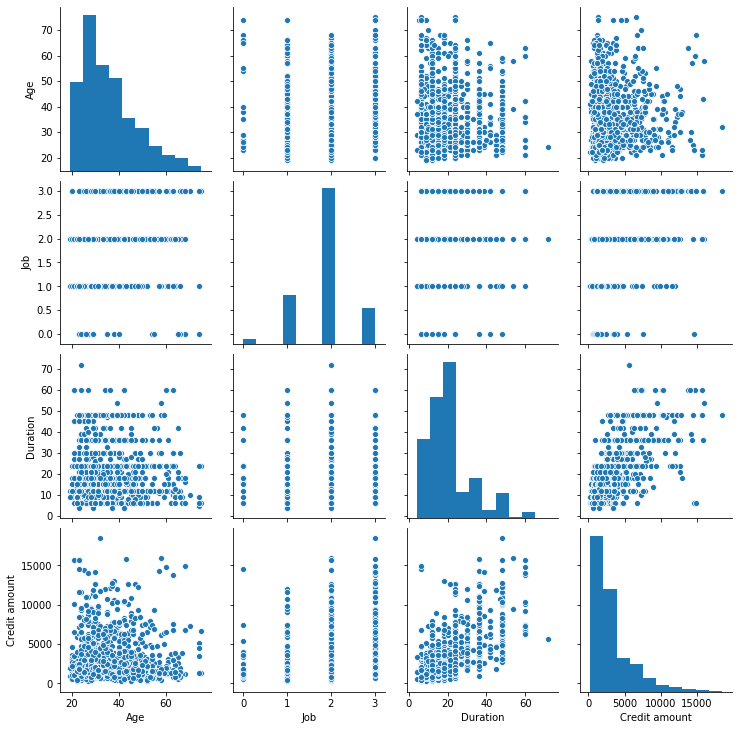

In [8]:
#pair plot 
plt.figure(figsize=(12, 8))
sns.pairplot(df[['Housing', 'Age', 'Sex', 'Housing', 'Job', 'Duration', 'Credit amount']])

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์  

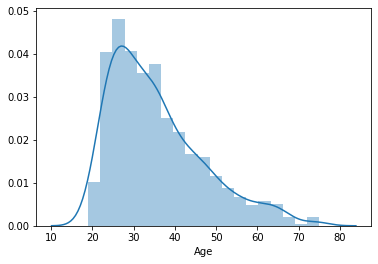

In [9]:
sns.distplot(df['Age'])

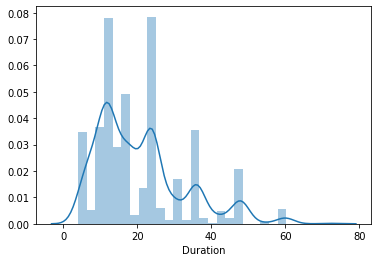

In [10]:
sns.distplot(df['Duration'])

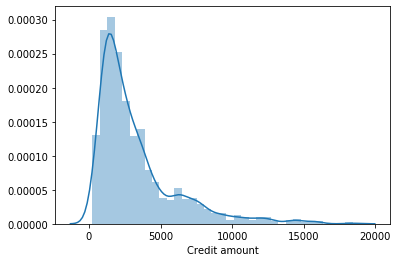

In [11]:
sns.distplot(df['Credit amount'])

In [12]:
#สร้าง Dummy Variable 
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)

In [13]:
df = df.merge(pd.get_dummies(df.Sex, drop_first = True , prefix = "Sex"), left_index = True, right_index = True)
df = df.merge(pd.get_dummies(df.Housing, drop_first = True , prefix = "Housing"), left_index = True, right_index = True)
df = df.merge(pd.get_dummies(df['Risk'], drop_first = True , prefix = "Risk"), left_index = True, right_index = True)

In [14]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose',
       'Risk', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others', 'Sex_male', 'Housing_own',
       'Housing_rent', 'Risk_good'],
      dtype='object')

In [15]:
#deleter old featurn
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Risk"]

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ  

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด  

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด  

10. สร้าง histogram ของ feature ที่สนใจ  

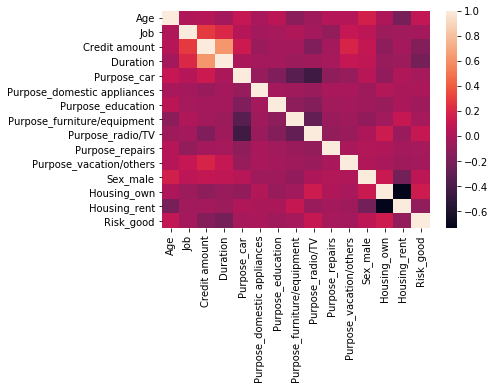

In [16]:
sns.heatmap(df.corr())

In [17]:
def find_max_corr(dataframe) :
  dataframe_corr = dataframe.corr()
  sorted_correlation = dataframe_corr.unstack().sort_values(ascending = False)
  return sorted_correlation
sort_correlation = find_max_corr(df)
sort_correlation

Risk_good                    Risk_good                      1.000000
Housing_rent                 Housing_rent                   1.000000
Job                          Job                            1.000000
Credit amount                Credit amount                  1.000000
Duration                     Duration                       1.000000
Purpose_car                  Purpose_car                    1.000000
Purpose_domestic appliances  Purpose_domestic appliances    1.000000
Purpose_education            Purpose_education              1.000000
Purpose_radio/TV             Purpose_radio/TV               1.000000
Purpose_repairs              Purpose_repairs                1.000000
Purpose_vacation/others      Purpose_vacation/others        1.000000
Sex_male                     Sex_male                       1.000000
Housing_own                  Housing_own                    1.000000
Purpose_furniture/equipment  Purpose_furniture/equipment    1.000000
Age                          Age  

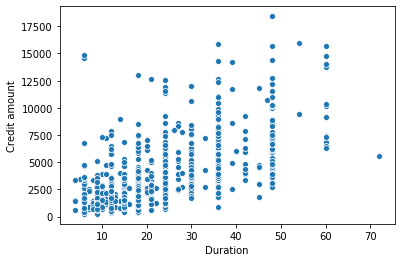

In [18]:
#max correlation ['Duration' , 'Credit amount' ,0.735968]
#min correlation ['Housing_own','Housing_rent', 0.003546]
sns.scatterplot(x = 'Duration', y = 'Credit amount', data = df)

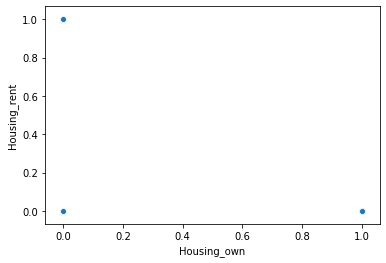

In [19]:

sns.scatterplot(x = 'Housing_own', y = 'Housing_rent', data = df)

### 10. สร้าง histogram ของ feature ที่สนใจ



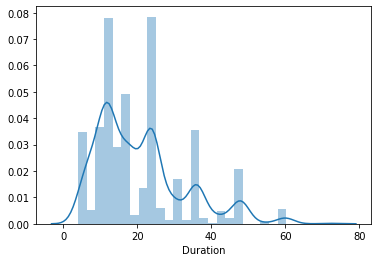

In [20]:
sns.distplot(df['Duration'])

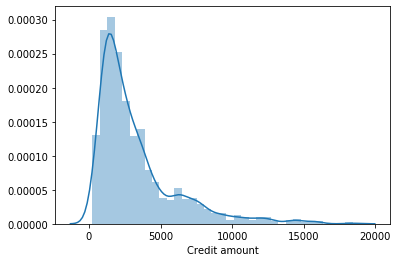

In [21]:
sns.distplot(df['Credit amount'])

### 11. สร้าง box plot ของ features ที่สนใจ


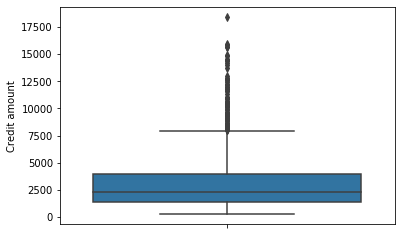

In [22]:
sns.boxplot(df['Credit amount'], orient='v')

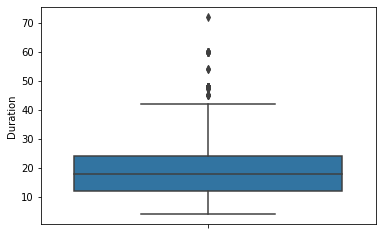

In [23]:
sns.boxplot(df['Duration'], orient='v')

### 13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)


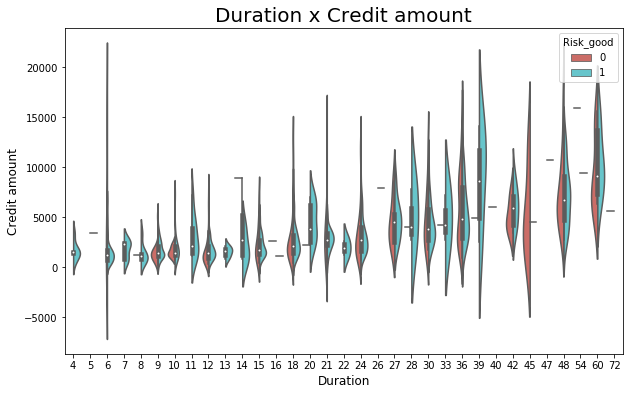

In [24]:
plt.figure(figsize = (10,6))

g = sns.violinplot(x="Duration",y="Credit amount",data=df,
                   hue="Risk_good", palette="hls",split=True)
g.set_xlabel("Duration", fontsize=12)
g.set_ylabel("Credit amount", fontsize=12)
g.set_title("Duration x Credit amount", fontsize=20)

plt.show()

12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ  
14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล 



In [25]:
X = df.drop(columns=['Risk_good'], axis=0)
y = df['Risk_good']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Min Max Normalization 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [28]:
min_max_scaler = MinMaxScaler()

In [29]:
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
64,0.214286,0.333333,0.527937,0.470588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
591,0.428571,1.000000,0.119352,0.338235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
363,0.089286,0.666667,0.096650,0.073529,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
550,0.803571,0.333333,0.195944,0.073529,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
102,0.535714,0.333333,0.020057,0.117647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
min_max_scaler2 = MinMaxScaler()
X_test = min_max_scaler2.fit_transform(X_test)
X_test= pd.DataFrame(X_test, columns=X.columns)
X_test.sample(10)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
240,0.872727,0.666667,0.444558,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.054545,0.666667,0.263553,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
117,0.872727,1.000000,1.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
131,0.036364,0.666667,0.152465,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
56,0.527273,0.333333,0.232555,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
30,0.309091,0.666667,0.138536,0.111111,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
52,0.236364,0.666667,0.176226,0.444444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
51,0.509091,0.666667,0.052847,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
39,0.127273,0.666667,0.077905,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
154,0.054545,0.666667,0.108903,0.722222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
predicted = dtree.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
confusion_matrix(y_test, predicted)

array([[ 29,  36],
       [ 48, 137]], dtype=int64)

In [35]:
print("Accuracy", accuracy_score(y_test, predicted))
print("F1 Score", f1_score(y_test, predicted))
print("Precision", precision_score(y_test, predicted))
print("Recall", recall_score(y_test, predicted))
result = [[accuracy_score(y_test, predicted), f1_score(y_test, predicted), precision_score(y_test, predicted), recall_score(y_test, predicted)]]
summary = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Normalization'])
summary

Accuracy 0.664
F1 Score 0.7653631284916201
Precision 0.791907514450867
Recall 0.7405405405405405


,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541


### Standardization

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [38]:
X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
313,2.800098,0.150887,-0.727323,-1.232685,-0.690201,-0.122004,-0.246618,-0.460034,1.567234,-0.16122,-0.116248,0.677602,0.644278,-0.470636
497,-1.095814,0.150887,1.354764,1.254127,-0.690201,-0.122004,-0.246618,2.173750,-0.638067,-0.16122,-0.116248,-1.475793,-1.552125,2.124784
24,0.675055,0.150887,-0.218508,-0.403748,1.448852,-0.122004,-0.246618,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,-1.552125,2.124784
440,0.409425,1.680150,-0.470120,-0.486642,-0.690201,-0.122004,4.054856,-0.460034,-0.638067,-0.16122,-0.116248,0.677602,-1.552125,2.124784
393,0.409425,-1.378375,-0.890870,-0.735323,-0.690201,-0.122004,-0.246618,-0.460034,1.567234,-0.16122,-0.116248,0.677602,0.644278,-0.470636


In [39]:
X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
10,-0.868431,0.135104,-0.469283,-0.915168,-0.782881,-0.063372,-0.261488,2.0,-0.580429,-0.110208,-0.089803,0.648425,0.605079,-0.455773
45,-0.436634,0.135104,-0.720019,0.249591,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,0.605079,-0.455773
22,-0.868431,1.670379,0.778462,0.249591,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,-1.542199,-1.652678,2.194072
202,0.167883,0.135104,0.065942,0.249591,1.277333,-0.063372,-0.261488,-0.5,-0.580429,-0.110208,-0.089803,0.648425,0.605079,-0.455773
192,1.722354,0.135104,-0.666236,-1.247956,-0.782881,-0.063372,3.824265,-0.5,-0.580429,-0.110208,-0.089803,-1.542199,0.605079,-0.455773


In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
predicted = dtree.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
confusion_matrix(y_test, predicted)

array([[ 23,  42],
       [ 48, 137]], dtype=int64)

In [43]:
print("Accuracy", accuracy_score(y_test, predicted))
print("F1 Score", f1_score(y_test, predicted))
print("Precision", precision_score(y_test, predicted))
print("Recall", recall_score(y_test, predicted))
result = [[accuracy_score(y_test, predicted), f1_score(y_test, predicted), precision_score(y_test, predicted), recall_score(y_test, 
predicted)]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Standardization'])
summary = summary.append(prepare)
summary

Accuracy 0.64
F1 Score 0.7527472527472527
Precision 0.7653631284916201
Recall 0.7405405405405405


,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541
Standardization,0.640,0.752747,0.765363,0.740541


In [44]:
# 15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)
# 16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision

summary

,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541
Standardization,0.640,0.752747,0.765363,0.740541


In [45]:
# 17. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth': [4, 8, 16 ,32, 64], 'min_samples_leaf' : [1, 2, 4, 8, 16]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_combination, verbose = 3)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.667, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.667, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.733, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.673, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.693, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.673, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [46]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [47]:
grid_predicted = grid_search.predict(X_test)
confusion_matrix(y_test, grid_predicted)

array([[ 23,  42],
       [ 34, 151]], dtype=int64)

In [48]:
# Hyper Parameter Tuning
print("Accuracy", accuracy_score(y_test, grid_predicted))
print("F1 Score", f1_score(y_test, grid_predicted))
print("Precision", precision_score(y_test, grid_predicted))
print("Recall", recall_score(y_test, grid_predicted))
result = [[accuracy_score(y_test, grid_predicted), f1_score(y_test, grid_predicted), precision_score(y_test, grid_predicted), recall_score(y_test, grid_predicted)]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Hyperparameter Tuning'])
summary = summary.append(prepare)
summary

Accuracy 0.696
F1 Score 0.7989417989417988
Precision 0.7823834196891192
Recall 0.8162162162162162


,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541
Standardization,0.640,0.752747,0.765363,0.740541
Hyperparameter Tuning,0.696,0.798942,0.782383,0.816216


In [49]:
X.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent'],
      dtype='object')

In [50]:
# 18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features
feature_selected = X[['Age', 'Job', 'Credit amount', 'Duration']]


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_selected, y, test_size=0.25, random_state=7)

In [52]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=feature_selected.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration
578,0.196429,0.666667,0.096540,0.117647
645,0.232143,0.666667,0.319705,0.117647
537,0.321429,0.666667,0.028984,0.161765
250,0.303571,1.000000,0.276945,0.205882
594,0.285714,0.333333,0.062927,0.088235


In [53]:
min_max_scaler2 = MinMaxScaler()
X_test = min_max_scaler2.fit_transform(X_test)
X_test= pd.DataFrame(X_test, columns=feature_selected.columns)
X_test.sample(10)

,Age,Job,Credit amount,Duration
32,0.290909,0.666667,0.443261,0.444444
184,0.054545,0.666667,0.081524,0.166667
6,0.072727,0.666667,0.640380,0.555556
114,0.727273,0.666667,0.115390,0.333333
17,0.272727,1.000000,0.165233,0.333333
200,0.454545,0.666667,0.141950,0.018519
160,0.290909,0.333333,0.272498,0.333333
95,0.290909,0.666667,0.142496,0.555556
119,0.218182,0.666667,0.164687,0.222222
16,0.181818,0.666667,0.127748,0.111111


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)
predicted2 = dtree2.predict(X_test)

In [55]:
confusion_matrix(y_test, predicted)

array([[ 23,  42],
       [ 48, 137]], dtype=int64)

In [56]:
# 20. ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
# 21. ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization


In [57]:
print("Accuracy", accuracy_score(y_test, predicted2))
print("F1 Score", f1_score(y_test, predicted2))
print("Precision", precision_score(y_test, predicted2))
print("Recall", recall_score(y_test, predicted2))
result = [[accuracy_score(y_test, predicted2), f1_score(y_test, predicted2), precision_score(y_test, predicted2), recall_score(y_test, predicted2)]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Some Feature'])
summary = summary.append(prepare)
summary

Accuracy 0.644
F1 Score 0.7478753541076486
Precision 0.7857142857142857
Recall 0.7135135135135136


,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541
Standardization,0.640,0.752747,0.765363,0.740541
Hyperparameter Tuning,0.696,0.798942,0.782383,0.816216
Some Feature,0.644,0.747875,0.785714,0.713514


In [58]:
# 22. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Decision Tree Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ Normalization/Standardization ?)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)


In [59]:
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.sample(5)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
181,0.178571,1.000000,0.132411,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
430,0.107143,0.666667,0.051245,0.073529,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
506,0.571429,0.333333,0.122934,0.073529,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
290,0.107143,0.666667,0.054111,0.294118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
541,0.464286,0.333333,0.205532,0.352941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [60]:
min_max_scaler2 = MinMaxScaler()
X_test = min_max_scaler2.fit_transform(X_test)
X_test= pd.DataFrame(X_test, columns=X.columns)
X_test.sample(10)

,Age,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_male,Housing_own,Housing_rent
194,0.181818,0.666667,0.026560,0.111111,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
119,0.218182,0.666667,0.164687,0.222222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
131,0.036364,0.666667,0.152465,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.072727,0.666667,0.640380,0.555556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
167,0.672727,0.666667,0.230234,0.444444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
243,0.200000,0.333333,0.195139,0.444444,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
41,0.127273,0.666667,0.236310,0.555556,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
122,0.200000,0.666667,0.081865,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
86,0.327273,0.333333,0.085006,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
188,0.218182,0.333333,0.046497,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
dtree2 = DecisionTreeClassifier()
dtree2.fit(X_train, y_train)
predicted2 = dtree2.predict(X_test)


In [62]:
confusion_matrix(y_test, predicted)

array([[ 23,  42],
       [ 48, 137]], dtype=int64)

In [63]:
print("Accuracy", accuracy_score(y_test, predicted2))
print("F1 Score", f1_score(y_test, predicted2))
print("Precision", precision_score(y_test, predicted2))
print("Recall", recall_score(y_test, predicted2))

Accuracy 0.668
F1 Score 0.7648725212464589
Precision 0.8035714285714286
Recall 0.7297297297297297


In [64]:
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth': [4, 8, 16 ,32, 64], 'min_samples_leaf' : [1, 2, 4, 8, 16]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_combination, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.667, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.667, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.727, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.673, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1 .................................
[CV] ..... max_depth=4, min_samples_leaf=1, score=0.693, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_depth=4, min_samples_leaf=2, score=0.673, total=   0.0s
[CV] max_depth=4, min_samples_leaf=2 .................................
[CV] ..... max_

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [65]:
grid_predicted = grid_search.predict(X_test)
confusion_matrix(y_test, grid_predicted)

array([[ 21,  44],
       [ 33, 152]], dtype=int64)

In [66]:
print("Accuracy", accuracy_score(y_test, grid_predicted))
print("F1 Score", f1_score(y_test, grid_predicted))
print("Precision", precision_score(y_test, grid_predicted))
print("Recall", recall_score(y_test, grid_predicted))
result = [[accuracy_score(y_test, grid_predicted), f1_score(y_test, grid_predicted), precision_score(y_test, grid_predicted), recall_score(y_test, grid_predicted)]]
prepare = pd.DataFrame(result,columns=['Accuracy','F1 score','Recall','Precision'],index=['Hyperparameter Tuning + Normalizatio'])
summary = summary.append(prepare)
summary

Accuracy 0.692
F1 Score 0.7979002624671916
Precision 0.7755102040816326
Recall 0.8216216216216217


,Accuracy,F1 score,Recall,Precision
Normalization,0.664,0.765363,0.791908,0.740541
Standardization,0.640,0.752747,0.765363,0.740541
Hyperparameter Tuning,0.696,0.798942,0.782383,0.816216
Some Feature,0.644,0.747875,0.785714,0.713514
Hyperparameter Tuning + Normalizatio,0.692,0.797900,0.775510,0.821622
